# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from PIL import Image
import os

# Function definitions

In [3]:
# Define the integrand function for x-coordinate
def x_integrand(s, omega, M):
    return np.cos(omega * np.sin(2 * np.pi * s / M))

# Define the integrand function for y-coordinate
def y_integrand(s, omega, M):
    return np.sin(omega * np.sin(2 * np.pi * s / M))

# Define radius of curvature
def R(Lm, K):
    return Lm * K ** (1.27) / (16.34 * (K ** (0.5) - 1) ** (0.5))

# Make sine-generated rivers

Replace the lists in the next cell with the desired values of omega, M, and n. 
M simply scales the length of a meander. If you leave M=1, n will be the number of meanders. 

In [4]:
# Define the parameter lists
omega_list = [0.5, 1.0, 1.5, 2.0]  # Example omega values
M_list = [1.0]       # Example M values
n_list = [1, 3, 5, 8, 10]     

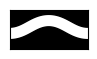

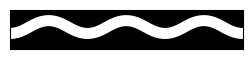

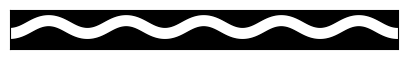

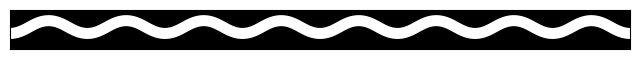

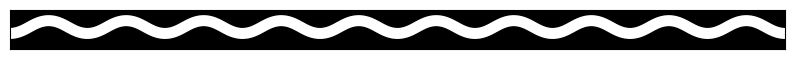

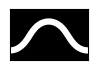

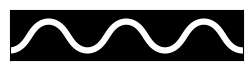

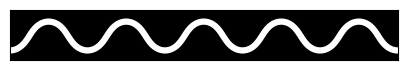

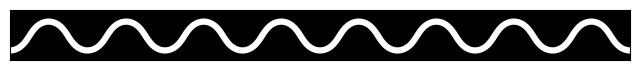

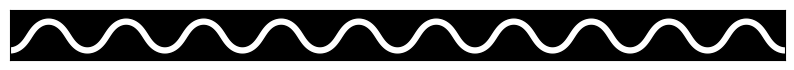

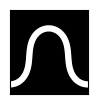

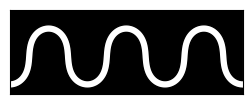

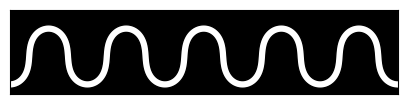

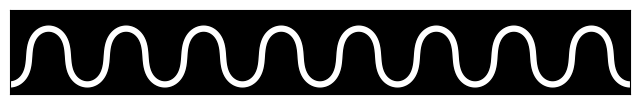

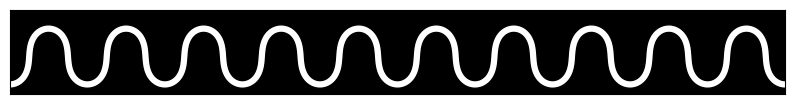

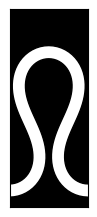

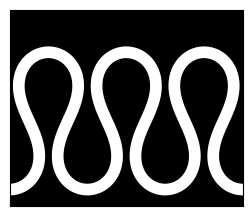

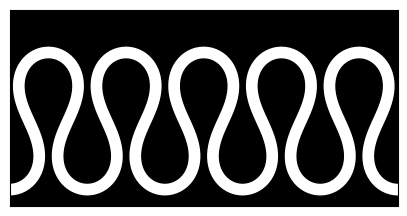

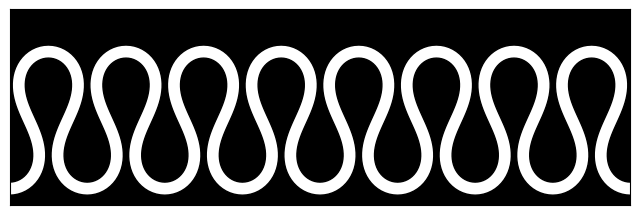

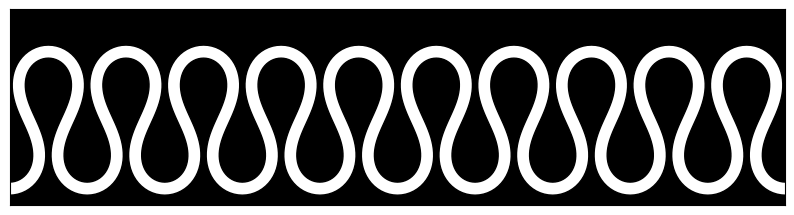

In [5]:
# Loop through all combinations of omega, M, and n
for omega in omega_list:
    for M in M_list:
        for n in n_list:
            # Calculate sine-generated curve

            # Define the range of t values
            t_values = np.arange(0.0, n + 0.01, 0.01)

            # Perform numerical integration for each t value
            xs = []
            for t in t_values:
                x, _ = quad(x_integrand, 0, t, args=(omega, M), limit=1000)
                xs.append(x)

            ys = []
            for t in t_values:
                y, _ = quad(y_integrand, 0, t, args=(omega, M), limit=1000)
                ys.append(y)

            # Convert results to array
            xs = np.array(xs)
            ys = np.array(ys)

            # Generate 2 parallel curves (riverbanks)

            # Radius of curvature
            Lm, __ = quad(x_integrand, 0, M, args=(omega, M), limit=1000)
            Am, __ = quad(y_integrand, 0, M / 2, args=(omega, M), limit=1000)
            K = M / Lm #sinuosity

            # Compute radius of curvature
            rm = R(Lm, K)
            width = rm / 2.3

            # Compute tangent vectors
            dx_dt = np.gradient(xs)
            dy_dt = np.gradient(ys)
            norm = np.sqrt(dx_dt ** 2 + dy_dt ** 2)
            dx_dt /= norm
            dy_dt /= norm

            # Define offset distance
            offset_distance = width / 2  # Adjust as needed

            # Compute offset curve
            xs_offset_lower = xs + offset_distance * dy_dt
            ys_offset_lower = ys - offset_distance * dx_dt
            xs_offset_upper = xs - offset_distance * dy_dt
            ys_offset_upper = ys + offset_distance * dx_dt

            # Save the plot to the specified folder

            # To generate the file name, modify omega
            if omega % 1 == 0:
                w = str(int(omega))  # Convert to integer to remove trailing zero
            else:
                w = str(omega).replace('.', 'point')  # Replace period with "point"

            # Plot "filled" river
            im_width = n / M * Lm  # image width in x-axis units

            fig, ax = plt.subplots(figsize=(n, 5))
            plt.gca().set_facecolor('white')
            ax.set_aspect('equal', adjustable='box')
            ax.set_xticks([])
            ax.set_yticks([])
            xmax = np.min([np.max(xs), np.max(xs_offset_upper), np.max(xs_offset_lower)])
            xmin = np.max([np.min(xs), np.min(xs_offset_upper), np.min(xs_offset_lower)])
            ax.set_xlim(xmin, xmax)
            ymin = np.min([np.min(ys), np.min(ys_offset_lower)])*2.5
            ymax = np.max([np.max(ys), np.max(ys_offset_upper)])*1.25
            ax.set_ylim(ymin, ymax)
            ax.fill_between(xs_offset_upper, ys_offset_upper, np.ones(len(xs_offset_upper))*5, color='black')     
            ax.fill_between(xs_offset_lower, np.ones(len(xs_offset_upper))*-5, ys_offset_lower, color='black')
            plt.show()
